# KNN

In [16]:
#librerias
import sklearn 
import sklearn.neighbors as nb  
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.proportion import proportion_confint
import pandas as pd

In [17]:
df = pd.read_csv('preprocessed.csv')
y = df['match']

x = pd.read_csv('KNN.csv')

In [25]:
# Dividir los datos en conjunto de entrenamiento y prueba con un 20% de los datos para prueba
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=1)

# Create a kNN classifier object
knc = KNeighborsClassifier()

# Entrenar el clasificador kNN
knc.fit(X_train, y_train)

print(knc.score(X_test, y_test))


0.8597852028639618


Se obtiene que la precisión del clasificador kNN en el conjunto de prueba es de 0.8597852028639618.

Esta precisión indica la proporción de predicciones correctas que hizo el modelo sobre el conjunto de datos de prueba. En otras palabras, el 85.98% de las muestras en el conjunto de prueba fueron clasificadas correctamente por el modelo de kNN.

In [26]:
# Matriz de confusión
y_pred = knc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1353   49]
 [ 186   88]]


La matriz de confusión permite visualizar el desempeño de un modelo de clasificación.

La matriz está organizada de la siguiente manera:

Verdaderos negativos (TN): Muestras que fueron clasificadas correctamente como negativas por el modelo. -> Se clasificaron correctamente 1353 muestras como negativas.
Falsos positivos (FP): Muestras clasificadas incorrectamente como positivas por el modelo. -> Se clasificaron incorrectamente 49 muestras como positivas cuando eran negativas.
Falsos negativos (FN): Muestras clasificadas incorrectamente como negativas por el modelo. -> Se clasificaron incorrectamente 186 muestras como negativas cuando eran positivas.
Verdaderos positivos (TP): Muestras que fueron clasificadas correctamente como positivas por el modelo. -> Se clasificaron correctamente 88 muestras como positivas (TP).

In [28]:
# se imprime el reporte de clasificación
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1402
           1       0.64      0.32      0.43       274

    accuracy                           0.86      1676
   macro avg       0.76      0.64      0.67      1676
weighted avg       0.84      0.86      0.84      1676



Estas métricas proporcionan una visión detallada del rendimiento del clasificador para cada clase individualmente, así como una visión general del rendimiento del clasificador en general.

La información se puede interpretar de la siguiente manera:

- Precision: Es la proporción de verdaderos positivos (TP) sobre el total de muestras clasificadas como positivas (TP + FP). Indica la precisión del clasificador en predecir las muestras positivas.

- Recall (Sensibilidad): Es la proporción de verdaderos positivos (TP) sobre el total de muestras que son realmente positivas (TP + FN). Indica la capacidad del clasificador para encontrar todas las muestras positivas.

- F1-score: Es una medida armónica entre la precisión y el recall. Proporciona un balance entre ambas métricas y es útil cuando hay un desequilibrio entre las clases en el conjunto de datos.

- Support: Es el número de muestras en cada clase, es decir, la cantidad de muestras reales que pertenecen a cada clase.

En resumen, el clasificador tiene una precisión general del 86%, con una precisión alta para la clase 0 y una precisión más baja para la clase 1. Esto sugiere que el clasificador es bueno para predecir la clase 0 pero menos preciso para predecir la clase 1.

In [ ]:
cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=x,  
                            y=y,  
                            cv=10, scoring='accuracy')  

print(cv_scores)

[0.84009547 0.82338902 0.76491647 0.71957041 0.74224344 0.85560859
 0.82338902 0.81980907 0.7562724  0.85424134]


Los resultados representan la precisión del clasificador kNN, evaluado mediante validación cruzada con 10 pliegues. Cada valor en la lista cv_scores corresponde a la precisión del clasificador en una de las 10 iteraciones de la validación cruzada.

El primer valor, 0.84009547, indica que en la primera iteración de la validación cruzada, el clasificador logró una precisión del 84.01% en el conjunto de datos de prueba.

El segundo valor, 0.82338902, indica que en la segunda iteración, la precisión fue del 82.34%.

Los valores restantes siguen el mismo patrón, representando la precisión en las iteraciones sucesivas de la validación cruzada.

La validación cruzada proporciona una estimación más confiable del rendimiento del clasificador al evaluarlo en múltiples divisiones del conjunto de datos. Los resultados muestran que la precisión del clasificador varía entre aproximadamente el 71.96% y el 85.56% en diferentes iteraciones de la validación cruzada.

In [ ]:
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.7999535219259601
0.04698537241680962


In [ ]:
# validación cruzada 
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=x, y=y,  cv=10)  

print(sklearn.metrics.confusion_matrix(y, predicted))
print(sklearn.metrics.accuracy_score(y, predicted))

[[6285  713]
 [ 963  417]]
0.7999522559083313


La matriz de confusión muestra los siguientes resultados:

- Verdaderos positivos (TP): 417 muestras fueron clasificadas correctamente como positivas.
- Falsos positivos (FP): 713 muestras fueron clasificadas incorrectamente como positivas.
- Verdaderos negativos (TN): 6285 muestras fueron clasificadas correctamente como negativas.
- Falsos negativos (FN): 963 muestras fueron clasificadas incorrectamente como negativas.
- La precisión global del clasificador, que es del 79.99%, indica qué tan bien el clasificador ha clasificado correctamente todas las muestras en general.

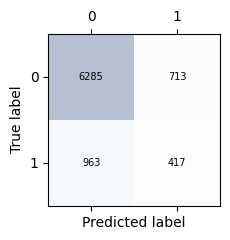

In [ ]:
confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1402
           1       0.64      0.32      0.43       274

    accuracy                           0.86      1676
   macro avg       0.76      0.64      0.67      1676
weighted avg       0.84      0.86      0.84      1676



- Precisión (Precision): 
    -> Para la clase 0, la precisión es del 88%, lo que significa que el 88% de las muestras clasificadas como positivas (0) fueron clasificadas correctamente
    -> Para la clase 1, la precisión es del 64%, lo que indica que el 64% de las muestras clasificadas como positivas (1) fueron clasificadas correctamente.

- Recall (Sensibilidad): 
    -> Para la clase 0, el recall es del 97%, lo que significa que el 97% de las muestras que realmente son positivas (0) fueron clasificadas correctamente. 
    -> Para la clase 1, el recall es del 32%, lo que indica que solo el 32% de las muestras que realmente son positivas (1) fueron clasificadas correctamente.

- F1-score: Es una medida armónica entre la precisión y el recall. Para la clase 0, el F1-score es del 92%, mientras que para la clase 1 es del 43%.

- Support: Es el número de muestras en cada clase.

- Exactitud (Accuracy): Es del 86%, lo que indica la proporción de muestras clasificadas correctamente en general.

- La media ponderada (weighted avg) y la media macro (macro avg) proporcionan promedios de las métricas para todas las clases.

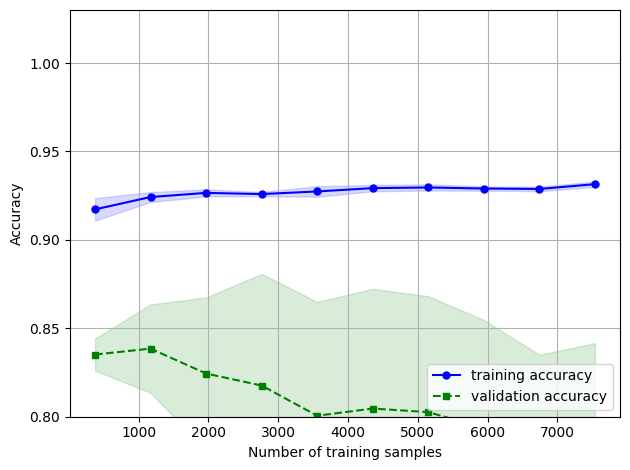

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=3),
                               X=x,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

La gráfica muestra la precisión de entrenamiento y validación de un modelo de aprendizaje automático en función del número de muestras de entrenamiento utilizadas. Muy útil para entender cómo el tamaño del conjunto de entrenamiento afecta el rendimiento del modelo, tanto en el aprendizaje como en la validación.

### Componentes de la Gráfica

1. **Eje X (Número de Muestras de Entrenamiento):**
   - Representa la cantidad de datos de entrenamiento utilizados para entrenar el modelo. A medida que aumenta el número de muestras, el modelo tiene más información para aprender.

2. **Eje Y (Precisión):**
   - Muestra la precisión del modelo, tanto en el conjunto de entrenamiento como en el de validación. La precisión es una medida de cuántas predicciones fueron correctas.

3. **Línea Azul (Precisión de Entrenamiento):**
   - Indica cómo el modelo se desempeña sobre el propio conjunto de entrenamiento. Esta línea es bastante plana y alta, lo que sugiere que el modelo tiene un buen desempeño consistente en el conjunto de entrenamiento a medida que aumenta el número de muestras.

4. **Línea Verde (Precisión de Validación):**
   - Muestra la precisión del modelo en un conjunto de datos que no se utilizó durante el entrenamiento (validación). Esta línea comienza más baja y aumenta, aunque parece estabilizarse y no alcanza la precisión de la línea de entrenamiento.

5. **Área Sombreada (Varianza):**
   - El sombreado alrededor de la línea de validación probablemente representa la varianza de la precisión de validación en múltiples ejecuciones o configuraciones. Una varianza más amplia indica mayor incertidumbre o inconsistencia en el rendimiento del modelo en el conjunto de validación.

### Interpretación

- **Alto Rendimiento en Entrenamiento:**
  - El modelo aprende muy bien del conjunto de entrenamiento, como lo indica la alta precisión en este conjunto.

- **Mejora y Estabilización en Validación:**
  - La precisión de validación mejora con más datos, lo cual es típico, ya que más datos proporcionan una mejor generalización. Sin embargo, no alcanza la precisión del entrenamiento, lo cual es común debido a que el modelo siempre está un poco más optimizado para los datos sobre los cuales se entrenó.

- **Brecha entre Entrenamiento y Validación:**
  - La diferencia constante entre las líneas de entrenamiento y validación sugiere un sobreajuste moderado, donde el modelo se desempeña bien en los datos de entrenamiento pero un poco peor en los datos no vistos. A medida que el modelo se entrena con más datos, esta brecha no se cierra significativamente.

  Si bien el modelo aprende bien, los valores que entrega no aseguran que sea un verdadero positivo o que no de falsos negativos, esto debido a la falta de datos de cuando si se hace match. 



In [ ]:
# Results with different parameters: 
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_train, y=y_train,  cv=10)  
print("Accuracy 1 neighbour:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_train, y=y_train,  cv=10)  
print("Accuracy 3 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_train, y=y_train,  cv=10)  
print("Accuracy 9 neighbours:",  np.mean(cv_scores))

Accuracy 1 neighbour: 0.838107080098761
Accuracy 3 neighbours: 0.8537700469337366
Accuracy 5 neighbours: 0.8516820517383277
Accuracy 7 neighbours: 0.8475047267388838
Accuracy 9 neighbours: 0.8436259092021265


Los resultados muestran como la precisión del clasificador K-Nearest Neighbors (KNN) varía al ajustar el número de vecinos utilizados en el modelo. Los valores de precisión se han calculado utilizando la validación cruzada de 10 pliegues (`cv=10`), método robusto para evaluar la generalización del modelo en diferentes subconjuntos del conjunto de datos de entrenamiento.

### Análisis de los Resultados

1. **Accuracy 1 neighbour: 0.838107080098761**
   - Con solo 1 vecino, el modelo es altamente sensible a las peculiaridades de los datos de entrenamiento. Esto puede conducir a un modelo que sobreajusta los datos, reflejando pequeñas fluctuaciones en el conjunto de entrenamiento que no son representativas del proceso general que se está modelando.

2. **Accuracy 3 neighbours: 0.8537700469337366**
   - Al aumentar a 3 vecinos, la precisión mejora, lo que sugiere que considerar más puntos cercanos para la clasificación ayuda a reducir el ruido y el sobreajuste que ocurre con un solo vecino. Este parece ser el punto óptimo en este conjunto particular de datos y configuración.

3. **Accuracy 5 neighbours: 0.8516820517383277**
   - La precisión se mantiene bastante alta con 5 vecinos, pero hay una ligera disminución comparada con 3 vecinos. Esto puede ser una indicación de que aumentar el número de vecinos comienza a incorporar más información general pero también puede empezar a incluir datos que son menos relevantes para la clasificación.

4. **Accuracy 7 neighbours: 0.8475047267388838**
   - Continuando la tendencia, el aumento a 7 vecinos disminuye aún más la precisión. Esto puede indicar que el modelo comienza a generalizar demasiado, perdiendo detalles importantes que son necesarios para una clasificación precisa en este conjunto de datos.

5. **Accuracy 9 neighbours: 0.8436259092021265**
   - Con 9 vecinos, la precisión sigue disminuyendo. Esto puede sugerir que el modelo está incorporando demasiados puntos que no son representativos de la clase real que necesita predecir, lo que conduce a predicciones menos precisas.

### Conclusiones e Implicaciones

- **Elección del Número de Vecinos**: El número óptimo de vecinos depende de la naturaleza de los datos y del equilibrio entre sobreajuste y subajuste. En este caso, 3 vecinos proporcionan la mejor precisión, lo que sugiere un buen balance entre captar la estructura subyacente de los datos y evitar el ruido aleatorio.

- **Efecto de la Dimensión de Vecinos en KNN**: En general, aumentar el número de vecinos en KNN hace que el algoritmo sea más robusto contra el ruido en los datos de entrenamiento, pero también puede causar un subajuste si se incluyen demasiados vecinos.

- **Validación Cruzada**: Es crucial continuar usando la validación cruzada cuando se experimenta con diferentes hiperparámetros, como el número de vecinos, para asegurarse de que las mejoras en la precisión son genuinas y no el resultado de peculiaridades específicas de una división particular de los datos.

In [ ]:
lista=[]    
for i in range(1, 11):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=i), X=X_train, y=y_train,  cv=10)  
    lista.append(np.mean(cv_scores))
    print("Accuracy", i ,"neighbour:", np.mean(cv_scores))

print()
print("Accuracy", lista.index((max(lista))) + 1, "neighbour:", max(lista))


Accuracy 1 neighbour: 0.838107080098761
Accuracy 2 neighbour: 0.8582492159174322
Accuracy 3 neighbour: 0.8537700469337366
Accuracy 4 neighbour: 0.8521307026714415
Accuracy 5 neighbour: 0.8516820517383277
Accuracy 6 neighbour: 0.8482507729608292
Accuracy 7 neighbour: 0.8475047267388838
Accuracy 8 neighbour: 0.8458651600418177
Accuracy 9 neighbour: 0.8436259092021265
Accuracy 10 neighbour: 0.8449689703494452

Accuracy 2 neighbour: 0.8582492159174322


Se realiza una evaluación sistemática de la precisión del modelo K-Nearest Neighbors (KNN) variando el número de vecinos desde 1 hasta 10, utilizando una validación cruzada de 10 pliegues para cada configuración. A continuación, almacena cada resultado de precisión en una lista y finalmente imprime la configuración que alcanza la máxima precisión. Analicemos los resultados:

### Resumen de Resultados:
- **Mayor Precisión Obtenida:** La mayor precisión se obtuvo con 2 vecinos, con un valor de aproximadamente 0.8582.
- **Tendencia General:** 
  - La precisión es máxima en 2 vecinos y disminuye a medida que el número de vecinos aumenta.
  - La precisión disminuye de manera más notoria después de 2 vecinos, indicando que agregar más vecinos diluye la capacidad del modelo para hacer predicciones precisas en este conjunto de datos.

### Análisis Detallado:

1. **Mejor Configuración (2 Vecinos)**:
   - Con 2 vecinos, el modelo alcanza su máxima precisión. Esto sugiere que el modelo puede capturar adecuadamente la estructura de los datos con un número muy pequeño de vecinos más cercanos, lo que indica una alta similitud local entre los puntos de datos de la misma clase.

2. **Disminución en la Precisión con Más Vecinos**:
   - A medida que aumenta el número de vecinos, la precisión tiende a disminuir. Esto puede ser indicativo de que al considerar más vecinos, se están incluyendo datos de otras clases que confunden al modelo, especialmente en un espacio de características donde las clases pueden no estar claramente separadas o pueden solaparse.
   - Con más vecinos, el modelo empieza a generalizar más, lo que podría ser útil en un contexto con datos muy ruidosos o con clases que no están bien definidas, pero en este caso parece perjudicar la precisión.

3. **Comportamiento a Mayor Número de Vecinos**:
   - Los resultados muestran cierta variabilidad y fluctuación en la precisión a medida que el número de vecinos aumenta más allá de 2, pero la tendencia general es de descenso, lo que sugiere que los beneficios de incluir más vecinos decrecen.


In [ ]:
lista=[]    
for i in range(1, 11):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors= i,weights='distance'), X=X_train, y=y_train,  cv=10)  
    lista.append(np.mean(cv_scores))
    print("Accuracy", i ,"neighbour: and distance weighting:", np.mean(cv_scores)) 

print()
print("Accuracy", lista.index((max(lista))) + 1,"neighbour: and distance weighting:", max(lista)) 


Accuracy 1 neighbour: and distance weighting: 0.838107080098761
Accuracy 2 neighbour: and distance weighting: 0.838107080098761
Accuracy 3 neighbour: and distance weighting: 0.8534715394710501
Accuracy 4 neighbour: and distance weighting: 0.8548168249660787
Accuracy 5 neighbour: and distance weighting: 0.8528756367195319
Accuracy 6 neighbour: and distance weighting: 0.8522797339680137
Accuracy 7 neighbour: and distance weighting: 0.8498921191360633
Accuracy 8 neighbour: and distance weighting: 0.8488473430166603
Accuracy 9 neighbour: and distance weighting: 0.8463106968881376
Accuracy 10 neighbour: and distance weighting: 0.8475045043041127

Accuracy 4 neighbour: and distance weighting: 0.8548168249660787


En esta serie de pruebas, se ha aplicado el algoritmo K-Nearest Neighbors (KNN) utilizando la opción de ponderación por distancia (`weights='distance'`) durante la validación cruzada de 10 pliegues. La ponderación por distancia es una técnica donde la influencia de cada vecino en la clasificación es proporcional a la inversa de su distancia al punto de consulta. Esto significa que los vecinos más cercanos tienen más influencia en la decisión final que los más lejanos.

### Resultados Obtenidos:
  
- **Resultados de Precisión**:
  - Con **1 y 2 vecinos**, la precisión es idéntica y relativamente baja comparada con configuraciones de más vecinos. Esto sugiere que con muy pocos vecinos, incluso la ponderación por distancia no puede compensar el ruido y la variabilidad en los datos.
  - A medida que **incrementas el número de vecinos hasta 4**, la precisión mejora, alcanzando un pico con **4 vecinos** (0.8548). Esto indica que un mayor número de vecinos, combinado con la ponderación por distancia, permite un mejor equilibrio entre sesgo y varianza, mejorando la generalización del modelo.
  - A partir de **5 vecinos en adelante**, la precisión comienza a disminuir gradualmente. Esto puede deberse a que al aumentar el número de vecinos, la influencia de los puntos más distantes (aunque ponderada) empieza a diluir la importancia de los más cercanos, posiblemente introduciendo ruido o desviaciones basadas en características menos relevantes.

### Conclusiones e Implicaciones:

1. **Ponderación por Distancia Efectiva**:
   - La ponderación por distancia parece ser efectiva hasta cierto punto, optimizando la precisión con 4 vecinos. Esto subraya la importancia de los vecinos más cercanos en la decisión de clasificación.

2. **Optimización del Número de Vecinos**:
   - Con 4 vecinos se obtiene la mejor precisión. Este es un hallazgo clave para configurar tu modelo KNN cuando se usa ponderación por distancia.


La elección de 4 vecinos con ponderación por distancia parece ser la más adecuada para este conjunto de datos particular, lo que proporciona una buena combinación de sensibilidad a los datos locales y resistencia al ruido.

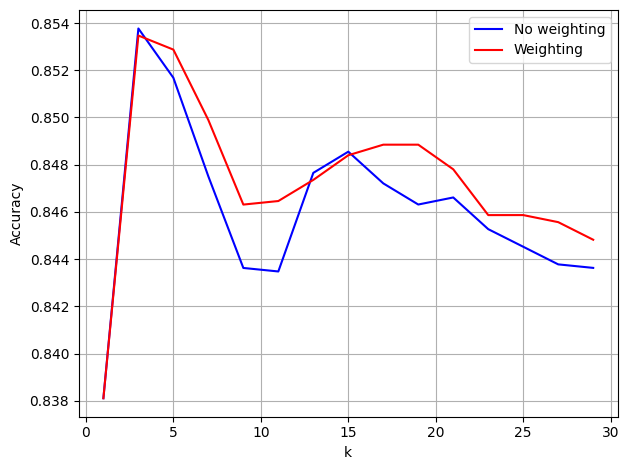

In [ ]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

El gráfico compara el desempeño de un modelo K-Nearest Neighbors (KNN) con dos configuraciones distintas: una utilizando el método de clasificación sin ponderación de distancias entre los vecinos y otra aplicando una ponderación por distancia. Las líneas representan la precisión del modelo evaluada mediante validación cruzada de 10 pliegues para diferentes números de vecinos \( k \) desde 1 hasta 29, en incrementos de 2. Aquí te explico la interpretación de los resultados mostrados en el gráfico:

### Interpretación del Gráfico

1. **Eje X - Número de Vecinos (k):**
   - Representa el número de vecinos \( k \) que el clasificador KNN considera para hacer una predicción. Los valores están incrementados de dos en dos desde 1 hasta 29.

2. **Eje Y - Precisión (Accuracy):**
   - Indica la precisión promedio obtenida a través de la validación cruzada de 10 pliegues para cada configuración de vecinos \( k \).

3. **Línea Azul (No Weighting):**
   - Muestra la precisión del modelo KNN cuando no se utiliza ponderación por distancia. Se observa que la precisión alcanza su máximo alrededor de \( k = 5 \) y luego tiende a disminuir a medida que \( k \) aumenta, aunque hay algunos picos menores de precisión a medida que \( k \) sigue incrementando.

4. **Línea Roja (Weighting):**
   - Representa la precisión del modelo KNN cuando se utiliza la ponderación por distancia. Este enfoque asigna una mayor influencia a los vecinos más cercanos en comparación con los más alejados. La línea roja muestra una tendencia similar a la azul en cuanto a la disminución general de la precisión a medida que \( k \) aumenta, pero con un patrón menos volátil.

### Observaciones Clave

- **Pico de Precisión en Pequeños k:**
   - Tanto la ponderación por distancia como sin ponderación muestran mayores niveles de precisión con un número pequeño de vecinos. Esto sugiere que un menor \( k \) es más efectivo para este conjunto de datos, lo cual es común en conjuntos donde las clases están bien definidas o menos superpuestas.

- **Comportamiento a Mayor \( k \):**
   - La precisión tiende a disminuir a medida que \( k \) aumenta, lo cual puede indicar que al incorporar más vecinos, el ruido o la diversidad de las clases dentro del radio de vecinos aumenta, lo que podría confundir al modelo.

- **Comparación de Ponderación vs No Ponderación:**
   - La línea roja (con ponderación) generalmente muestra menos variabilidad en la precisión que la línea azul (sin ponderación), sugiriendo que la ponderación por distancia puede ayudar a estabilizar el desempeño del modelo ante variaciones en \( k \).

### Conclusión y Recomendaciones

El gráfico muestra que, para este conjunto de datos y configuración del modelo KNN, un número pequeño de vecinos es preferible. Además, la ponderación por distancia parece ofrecer un rendimiento ligeramente más estable a medida que el número de vecinos aumenta. Sería prudente elegir un \( k \) en el rango de 3 a 7 basándose en estos datos, con una inclinación hacia el uso de ponderación por distancia si el modelo necesita ser más robusto frente a variaciones en el número de vecinos. Además, realizar pruebas adicionales con un conjunto de datos de prueba independiente puede ayudar a confirmar estos resultados y garantizar que el modelo generalice bien.

In [ ]:
params = {'n_neighbors':list(range(1,30)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 2, 'weights': 'uniform'} Accuracy= 0.8582492159174322


El resultado con `GridSearchCV` muestra cómo optimizar los hiperparámetros de un modelo K-Nearest Neighbors (KNN) utilizando una búsqueda exhaustiva a través de un rango de valores posibles para cada parámetro clave. Se ha evaluado el modelo con combinaciones de diferentes números de vecinos (`n_neighbors` de 1 a 29) y dos métodos de ponderación (`weights`: 'distance' y 'uniform').

### Descripción del Proceso:

- **GridSearchCV**: Este es un método que realiza una búsqueda exhaustiva sobre los parámetros especificados de un modelo. Para cada combinación de parámetros, ejecuta una validación cruzada (`cv=10`) y determina qué conjunto de parámetros produce la mejor precisión media en las validaciones cruzadas.
- **Parámetros**:
  - `n_neighbors`: Es el número de vecinos a considerar. Varía de 1 a 29.
  - `weights`: Dos opciones han sido consideradas:
    - 'uniform' - Todos los vecinos tienen el mismo peso.
    - 'distance' - Los vecinos son ponderados por el inverso de su distancia. Los más cercanos tienen una influencia mayor.
- **n_jobs=-1**: Permite que el proceso utilice todos los procesadores disponibles para acelerar la ejecución.
  
### Resultados Obtenidos:

- **Mejores Parámetros**:
  - `{'n_neighbors': 2, 'weights': 'uniform'}`: Esta combinación de parámetros fue la que obtuvo la mayor precisión. Significa que el modelo con 2 vecinos y ponderación uniforme fue el más eficaz para tu conjunto de datos.
- **Mejor Precisión**:
  - `Accuracy= 0.8582492159174322`: Este es el valor más alto de precisión alcanzado con la combinación de parámetros antes mencionada, obtenido a través de validación cruzada. Indica una alta capacidad de generalización bajo esta configuración.

### Implicaciones de los Resultados:

- **Optimización de Hiperparámetros**: El resultado sugiere que para este conjunto de datos, un pequeño número de vecinos es preferible, y que, contrario a lo que podrías esperar, la ponderación uniforme supera al modelo que pondera por distancia. Esto podría indicar que las distancias no difieren significativamente entre los vecinos más cercanos en tu conjunto de datos o que la distribución de clases es tal que los vecinos adicionales no introducen ruido significativo.
- **Evaluación del Modelo**: Aunque la validación cruzada con `GridSearchCV` proporciona una robusta estimación del desempeño del modelo.

En resumen, los resultados de tu `GridSearchCV` ofrecen una visión valiosa y una base sólida para tomar decisiones informadas sobre cómo configurar el modelo KNN para obtener el mejor rendimiento posible.

In [ ]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print(sklearn.metrics.accuracy_score(y_test, pred))

[[1373   29]
 [ 200   74]]
0.8633651551312649


Los resultados obtenidos representan la evaluación del modelo K-Nearest Neighbors (KNN) ajustado con los mejores parámetros encontrados a través de `GridSearchCV` sobre un conjunto de prueba. Vamos a analizar los dos resultados clave: la matriz de confusión y la precisión del modelo.

### Matriz de Confusión
La matriz de confusión muestra la distribución de las predicciones en comparación con los verdaderos valores objetivo:
- **[[1373, 29] [200, 74]]**

**Interpretación:**
- **1373 (Verdaderos Positivos, VP)**: El número de predicciones correctas donde el modelo predijo la clase positiva (asumiendo que la primera clase es la positiva) y esta era realmente la clase correcta.
- **29 (Falsos Negativos, FN)**: El número de veces que el modelo predijo incorrectamente la clase negativa cuando la verdadera clase era positiva.
- **200 (Falsos Positivos, FP)**: El número de veces que el modelo predijo incorrectamente la clase positiva cuando la verdadera clase era negativa.
- **74 (Verdaderos Negativos, VN)**: El número de predicciones correctas donde el modelo predijo la clase negativa y esta era realmente la clase correcta.

### Precisión del Modelo
- **0.8633651551312649 (86.34%)**

**Interpretación:**
La precisión general del modelo es del 86.34%. Esto significa que el 86.34% de las veces, el modelo hizo la predicción correcta, ya sea como positivo o como negativo. Esta es una medida útil para obtener una idea rápida de la efectividad general del modelo, pero debe considerarse junto con otras métricas para obtener una imagen completa.

### Análisis Adicional
1. **Sensibilidad y Especificidad**: 
   - **Sensibilidad (recall de la clase positiva)**: ¿Qué tan bueno es el modelo para detectar los positivos? En este caso es VP / (VP + FN) (1373 / (1373 + 29)).
   - **Especificidad**: ¿Qué tan bueno es el modelo para detectar los negativos? Esto es VN / (VN + FP) (74 / (74 + 200)).

2. **F1-Score**:
   - Podría ser útil calcular el F1-score, especialmente si las clases están desbalanceadas. El F1-score es la media armónica de la precisión y la sensibilidad y da una mejor medida del rendimiento incorrecto tanto de FP como de FN.

3. **Consideraciones de Desbalance de Clases**:
   - La matriz de confusión sugiere un posible desbalance de clases (muchos más verdaderos positivos que verdaderos negativos). Esto podría afectar la interpretación de la precisión y podría requerir un ajuste en el modelo o en la forma en que se manejan las clases durante el entrenamiento.


In [ ]:
# interval confidence
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
# or equivalent 
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.863 +/- 0.016


(0.8469218514982916, 0.8798084587642382)

Los resultados ofrecen un análisis más profundo sobre la precisión del modelo K-Nearest Neighbors (KNN) a través del cálculo del intervalo de confianza del 95%. Esta estadística es fundamental para entender el rango en el que se espera que varíe la verdadera precisión del modelo si el experimento se repitiese muchas veces bajo las mismas condiciones.

### Prueba de Aproximación por la Distribución Normal
- **`Can approximate by Normal Distribution?: True`**
  - Este resultado sugiere que la distribución de la precisión del modelo puede aproximarse razonablemente bien por una distribución normal. Esto se basa en la regla empírica que sugiere que la aproximación normal es adecuada si \( n \times p \times (1-p) > 5 \), donde \( n \) es el número de observaciones en el conjunto de prueba, y \( p \) es la precisión observada.
  - Dado que el resultado es verdadero, se puede proceder con seguridad utilizando métodos basados en la distribución normal para calcular el intervalo de confianza.

### Cálculo del Intervalo de Confianza del 95%
- **`Interval 95% confidence: 0.863 +/- 0.016`**
  - Este intervalo indica que, con un 95% de confianza, la verdadera precisión del modelo se encuentra dentro del rango de 0.863 ± 0.016. En términos prácticos, esto sugiere que si se repitiera el experimento (entrenamiento y prueba del modelo bajo las mismas condiciones) muchas veces, la precisión observada estaría entre 0.847 y 0.879 la mayoría de las veces.

### Uso de `proportion_confint`
- **`(0.8469218514982916, 0.8798084587642382)`**
  - Esta salida es otra forma de representar el intervalo de confianza del 95%, calculado directamente utilizando la función `proportion_confint` de una biblioteca estadística. Proporciona el límite inferior y superior del intervalo de confianza para la precisión del modelo, confirmando los cálculos manuales anteriores.

### Significado y Uso Práctico
- La estimación del intervalo de confianza es esencial para la evaluación robusta de modelos de aprendizaje automático. Permite tener en cuenta la incertidumbre en la estimación de la precisión debido a la variabilidad en el conjunto de datos de prueba.
- Saber que la precisión puede variar dentro de este rango ayudará a establecer expectativas realistas sobre el desempeño del modelo en la implementación real y evaluar el riesgo asociado con decisiones basadas en las predicciones del modelo.
- Este análisis también puede ser útil para comparar modelos. Si el intervalo de confianza de un modelo no se superpone con el de otro, puede ser una evidencia de que un modelo es significativamente mejor que otro.


In [ ]:
#Using Binomial distribution
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

(0.846120876959455, 0.8792480962125114)

Cuando calculas el intervalo de confianza para la proporción utilizando la distribución binomial, se está aplicando un método más exacto que la aproximación normal para situaciones donde la distribución subyacente de los datos sigue un modelo binomial, como es el caso con la clasificación binaria.

### Detalles del Método 'binom_test':

- **`proportion_confint`**: Esta función de una biblioteca estadística calcula el intervalo de confianza para una proporción basada en el conteo de éxitos y el número total de observaciones (ensayos).
- **`method='binom_test'`**: Especifica que el cálculo del intervalo de confianza debe realizarse utilizando el test exacto de binomial, que no asume una distribución normal y es adecuado para tamaños de muestra pequeños o cuando las proporciones son muy altas o muy bajas. Este método utiliza la prueba exacta de Fisher para determinar los límites del intervalo de confianza.

### Resultados Obtenidos:
- **Intervalo de Confianza:** `(0.846120876959455, 0.8792480962125114)`
  - Este intervalo de confianza del 95% sugiere que, con un nivel de confianza del 95%, la verdadera precisión del modelo se encuentra entre aproximadamente 84.61% y 87.92%. Este intervalo es ligeramente más ajustado y posiblemente más preciso que el calculado mediante la aproximación normal, especialmente si el tamaño de la muestra o las proporciones están en los extremos.

### Interpretación y Uso:
- **Precisión del Modelo**: Este intervalo te ofrece una estimación robusta y posiblemente más conservadora de la precisión del modelo, basada en el rendimiento observado en el conjunto de prueba.
- **Comparación con Aproximación Normal**: Los resultados son similares a los obtenidos con la aproximación normal, lo cual es bueno ya que proporciona coherencia en tus análisis. Sin embargo, el intervalo de confianza binomial es generalmente preferido por su precisión en casos con distribuciones no normales o tamaños de muestra pequeños.
- **Decisiones Basadas en Datos**: Al contar con una medida exacta del intervalo de confianza,se pueden tomar decisiones más informadas sobre la implementación del modelo en entornos de producción, evaluando el riesgo y la variabilidad en el desempeño esperado.

In [ ]:
# Build two classifiers
# Classifier 1 (3 Neighbours) successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=3), X=x, y=y,  cv=10) 
res1=np.zeros(y.shape)
res1[y_pred==y]=1

# Classifier 2 (7 Neighbours) 2 successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=7), X=x, y=y,  cv=10) 
res2=np.zeros(y.shape)
res2[y_pred==y]=1

# Build contingency matrix
n00 = np.sum([res1[res2==1]==1])
n11 = np.sum([res1[res2==0]==0])
n10 = np.sum([res1[res2==1]==0])
n01 = np.sum([res1[res2==0]==1])

# Chi -square test
print("Have the classifiers significant different accuracy?:",(np.abs(n01-n10)-1)**2/(n01+n10)>3.84)

Have the classifiers significant different accuracy?: True


Se ha construido dos clasificadores K-Nearest Neighbors (KNN) con diferentes números de vecinos (3 y 7) y se ha evaluado sus predicciones utilizando la validación cruzada. Luego, se ha comparado el rendimiento de ambos clasificadores mediante una matriz de contingencia y un test de Chi-cuadrado para determinar si sus diferencias en precisión son estadísticamente significativas. 

### Construcción de los Clasificadores:
1. **Clasificador 1 (3 Vecinos)**:
   - Utilizas `cross_val_predict` para obtener predicciones de validación cruzada para el modelo con 3 vecinos.
   - `res1` es un array donde asignas 1 a las predicciones correctas (donde la predicción coincide con la etiqueta verdadera).

2. **Clasificador 2 (7 Vecinos)**:
   - Repites el proceso con 7 vecinos.
   - `res2` es similar a `res1`, pero para el clasificador con 7 vecinos.

### Construcción de la Matriz de Contingencia:
Defines los términos de la matriz de contingencia basada en cuántas veces ambos clasificadores acertaron o fallaron juntos:
- **n00**: Número de veces que ambos clasificadores aciertan.
- **n11**: Número de veces que ambos clasificadores fallan.
- **n10**: Número de veces que el clasificador 1 falla pero el clasificador 2 acierta.
- **n01**: Número de veces que el clasificador 1 acierta pero el clasificador 2 falla.

### Test de Chi-cuadrado para Independencia:
- Se utiliza una forma del test de Chi-cuadrado para verificar si las diferencias en el rendimiento de ambos clasificadores son significativas. 

- Este cálculo se basa en la fórmula del test de McNemar, una versión especializada del test de Chi-cuadrado diseñada para comparar dos clasificadores sobre el mismo conjunto de datos. El valor de 3.84 corresponde al valor crítico de Chi-cuadrado con un grado de libertad al nivel de significancia del 5%.

### Resultado del Test:
- **`Have the classifiers significant different accuracy?: True`**
  - Esto indica que, según el test de McNemar, hay una diferencia estadísticamente significativa en la precisión de los dos clasificadores. La diferencia en el número de veces que un clasificador fue correcto mientras el otro no, ajustada por el tamaño de muestra de estas discrepancias, es lo suficientemente grande para considerar que no se debe al azar.

### Implicaciones:
- La significancia estadística en la diferencia de precisión sugiere que el número de vecinos en un clasificador KNN puede tener un impacto notable en su rendimiento, y que este impacto es importante de considerar al seleccionar el modelo para un problema específico.
- Es fundamental evaluar diferentes configuraciones del mismo algoritmo, ya que cambios aparentemente menores en los parámetros pueden resultar en mejoras significativas de rendimiento.

Este análisis es crucial para la selección de modelos en proyectos de ciencia de datos, asegurando que las decisiones se basen en evidencia estadística sólida y no en variaciones aleatorias del rendimiento del modelo.